# Assignment 1 - Building a Vision Model with Keras

In this assignment, you will build a simple vision model using Keras. The goal is to classify images from the Fashion MNIST dataset, which contains images of clothing items.

You will:
1. Load and inspect the Fashion MNIST dataset.
2. Run a simple baseline model to establish a performance benchmark.
3. Build and evaluate a simple CNN model, choosing appropriate loss and metrics.
4. Design and run controlled experiments on one hyperparameter (e.g., number of filters, kernel size, etc.) and one regularization technique (e.g., dropout, L2 regularization).
5. Analyze the results and visualize the model's performance.

# 1. Loading and Inspecting the Dataset

Fashion MNIST is a dataset of grayscale images of clothing items, with 10 classes. Each image is 28x28 pixels, like the MNIST dataset of handwritten digits. Keras provides a convenient way to load this dataset. 

In this section, you should:

- [ ] Inspect the shapes of the training and test sets to confirm their size and structure.
- [ ] Convert the labels to one-hot encoded format if necessary. (There is a utility function in Keras for this.)
- [ ] Visualize a few images from the dataset to understand what the data looks like.

In [1]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalize the pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Classes in the Fashion MNIST dataset
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
# Inspect the shapes of the datasets
print("X_train shape:", X_train.shape) 
print("y_train shape:", y_train.shape)  
print("X_test shape:", X_test.shape)    
print("y_test shape:", y_test.shape)    


# Convert labels to one-hot encoding
from tensorflow.keras.utils import to_categorical

y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

print("y_train_cat shape:", y_train_cat.shape) 
print("y_test_cat shape:", y_test_cat.shape)   


X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)
y_train_cat shape: (60000, 10)
y_test_cat shape: (10000, 10)


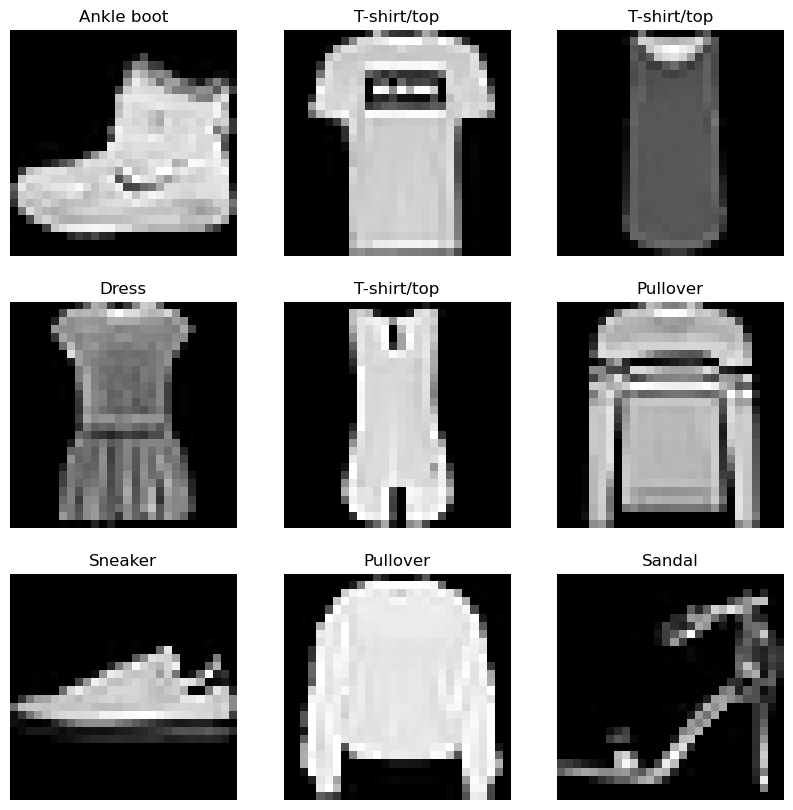

In [ ]:
import matplotlib.pyplot as plt
# Verify the data looks as expected

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(class_names[y_train[i]])
    plt.axis('off')

plt.show()

Reflection: Does the data look as expected? How is the quality of the images? Are there any issues with the dataset that you notice?

The images are as low resolution as expected. One issue though is that some classes look quite alike; even a human might struggle to distinguish the difference between dresses and tops or boots and sneakers.

# 2. Baseline Model

In this section, you will create a linear regression model as a baseline. This model will not use any convolutional layers, but it will help you understand the performance of a simple model on this dataset.
You should:
- [ ] Create a simple linear regression model using Keras.
- [ ] Compile the model with an appropriate loss function and optimizer.
- [ ] Train the model on the training set and evaluate it on the test set.

A linear regression model can be created using the `Sequential` API in Keras. Using a single `Dense` layer with no activation function is equivalent to a simple linear regression model. Make sure that the number of units in the output layer matches the number of classes in the dataset.

Note that for this step, we will need to use `Flatten` to convert the 2D images into 1D vectors before passing them to the model. Put a `Flatten()` layer as the first layer in your model so that the 2D image data can be flattened into 1D vectors.

In [14]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

# Create a simple linear regression model
model = Sequential()
# You can use `model.add(<layer>)` to add layers to the model
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model using `model.compile()`
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with `model.fit()`
model.fit(X_train, y_train_cat,
          epochs=10,
          batch_size=32,
          validation_split=0.1,
          verbose=2)

# Evaluate the model with `model.evaluate()`
test_loss, test_acc = model.evaluate(X_test, y_test_cat)


/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1688/1688 - 2s - 971us/step - accuracy: 0.7397 - loss: 0.7981 - val_accuracy: 0.8023 - val_loss: 0.5769
Epoch 2/10
1688/1688 - 1s - 715us/step - accuracy: 0.8188 - loss: 0.5335 - val_accuracy: 0.8260 - val_loss: 0.5057
Epoch 3/10
1688/1688 - 1s - 656us/step - accuracy: 0.8340 - loss: 0.4831 - val_accuracy: 0.8347 - val_loss: 0.4747
Epoch 4/10
1688/1688 - 1s - 774us/step - accuracy: 0.8425 - loss: 0.4564 - val_accuracy: 0.8378 - val_loss: 0.4471
Epoch 5/10
1688/1688 - 1s - 619us/step - accuracy: 0.8491 - loss: 0.4380 - val_accuracy: 0.8395 - val_loss: 0.4419
Epoch 6/10
1688/1688 - 1s - 654us/step - accuracy: 0.8524 - loss: 0.4252 - val_accuracy: 0.8480 - val_loss: 0.4244
Epoch 7/10
1688/1688 - 1s - 724us/step - accuracy: 0.8561 - loss: 0.4138 - val_accuracy: 0.8495 - val_loss: 0.4216
Epoch 8/10
1688/1688 - 1s - 661us/step - accuracy: 0.8596 - loss: 0.4041 - val_accuracy: 0.8573 - val_loss: 0.4034
Epoch 9/10
1688/1688 - 1s - 657us/step - accuracy: 0.8627 - loss: 0.3959 - val_a

Reflection: What is the performance of the baseline model? How does it compare to what you expected? Why do you think the performance is at this level?

The baseline model reached almost 86% accuracy, which is better than expected for such a simple setup.

# 3. Building and Evaluating a Simple CNN Model

In this section, you will build a simple Convolutional Neural Network (CNN) model using Keras. A convolutional neural network is a type of deep learning model that is particularly effective for image classification tasks. Unlike the basic neural networks we have built in the labs, CNNs can accept images as input without needing to flatten them into vectors.

You should:
- [ ] Build a simple CNN model with at least one convolutional layer (to learn spatial hierarchies in images) and one fully connected layer (to make predictions).
- [ ] Compile the model with an appropriate loss function and metrics for a multi-class classification problem.
- [ ] Train the model on the training set and evaluate it on the test set.

Convolutional layers are designed to accept inputs with three dimensions: height, width and channels (e.g., RGB for color images). For grayscale images like those in Fashion MNIST, the input shape will be (28, 28, 1).

When you progress from the convolutional layers to the fully connected layers, you will need to flatten the output of the convolutional layers. This can be done using the `Flatten` layer in Keras, which doesn't require any parameters.

In [17]:
from keras.layers import Conv2D

# Reshape the data to include the channel dimension
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Create a simple CNN model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_cat,
          epochs=10,
          batch_size=32,
          validation_split=0.1,
          verbose=2)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test_cat)

Epoch 1/10
1688/1688 - 7s - 4ms/step - accuracy: 0.8512 - loss: 0.4220 - val_accuracy: 0.8732 - val_loss: 0.3452
Epoch 2/10
1688/1688 - 7s - 4ms/step - accuracy: 0.8922 - loss: 0.2997 - val_accuracy: 0.8925 - val_loss: 0.3006
Epoch 3/10
1688/1688 - 7s - 4ms/step - accuracy: 0.9084 - loss: 0.2585 - val_accuracy: 0.8922 - val_loss: 0.3005
Epoch 4/10
1688/1688 - 6s - 4ms/step - accuracy: 0.9174 - loss: 0.2296 - val_accuracy: 0.9025 - val_loss: 0.2865
Epoch 5/10
1688/1688 - 8s - 5ms/step - accuracy: 0.9266 - loss: 0.2065 - val_accuracy: 0.9007 - val_loss: 0.2960
Epoch 6/10
1688/1688 - 7s - 4ms/step - accuracy: 0.9336 - loss: 0.1851 - val_accuracy: 0.8980 - val_loss: 0.3020
Epoch 7/10
1688/1688 - 7s - 4ms/step - accuracy: 0.9398 - loss: 0.1675 - val_accuracy: 0.9012 - val_loss: 0.3068
Epoch 8/10
1688/1688 - 6s - 4ms/step - accuracy: 0.9469 - loss: 0.1509 - val_accuracy: 0.9020 - val_loss: 0.3104
Epoch 9/10
1688/1688 - 7s - 4ms/step - accuracy: 0.9511 - loss: 0.1370 - val_accuracy: 0.9010 - 

Reflection: Did the CNN model perform better than the baseline model? If so, by how much? What do you think contributed to this improvement?

Yes, the CNN model performed about 4% better than the baseline. The improvement is likely due to convolutional layers capturing spatial features that a simple linear model doesn't.

# 3. Designing and Running Controlled Experiments

In this section, you will design and run controlled experiments to improve the model's performance. You will focus on one hyperparameter and one regularization technique.
You should:
- [ ] Choose one hyperparameter to experiment with (e.g., number of filters, kernel size, number of layers, etc.) and one regularization technique (e.g., dropout, L2 regularization). For your hyperparameter, you should choose at least three different values to test (but there is no upper limit). For your regularization technique, simply test the presence or absence of the technique.
- [ ] Run experiments by modifying the model architecture or hyperparameters, and evaluate the performance of each model on the test set.
- [ ] Record the results of your experiments, including the test accuracy and any other relevant metrics.
- [ ] Visualize the results of your experiments using plots or tables to compare the performance of different models.

The best way to run your experiments is to create a `for` loop that iterates over a range of values for the hyperparameter you are testing. For example, if you are testing different numbers of filters, you can create a loop that runs the model with 32, 64, and 128 filters. Within the loop, you can compile and train the model, then evaluate it on the test set. After each iteration, you can store the results in a list or a dictionary for later analysis.

Note: It's critical that you re-initialize the model (by creating a new instance of the model) before each experiment. If you don't, the model will retain the weights from the previous experiment, which can lead to misleading results.

In [21]:
# A. Test Hyperparameters

filter_values = [32, 64, 128]
results = []

for filters in filter_values:
    model = Sequential()
    model.add(Conv2D(filters=filters, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train_cat, epochs=5, batch_size=64, validation_data=(X_test, y_test_cat))

    test_loss, test_acc = model.evaluate(X_test, y_test_cat)
    results.append((filters, test_acc))


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7949 - loss: 0.5929 - val_accuracy: 0.8711 - val_loss: 0.3647
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8864 - loss: 0.3217 - val_accuracy: 0.8832 - val_loss: 0.3332
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9020 - loss: 0.2789 - val_accuracy: 0.8906 - val_loss: 0.3105
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9140 - loss: 0.2467 - val_accuracy: 0.8935 - val_loss: 0.2988
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9189 - loss: 0.2262 - val_accuracy: 0.8964 - val_loss: 0.2909
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8995 - loss: 0.2905
Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8085 - loss: 0.5447 - val_accuracy: 0.8786 - val_loss: 0.3348
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.8988 - loss: 0.2890 - val_accuracy: 0.8865 - val_loss: 0.3082
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━

In [22]:
# B. Test presence or absence of regularization
from keras.layers import Dropout

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_cat,
          epochs=10,
          batch_size=32,
          validation_split=0.1,
          verbose=2)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test_cat)

Epoch 1/10
1688/1688 - 10s - 6ms/step - accuracy: 0.8520 - loss: 0.4207 - val_accuracy: 0.8782 - val_loss: 0.3502
Epoch 2/10
1688/1688 - 9s - 6ms/step - accuracy: 0.8919 - loss: 0.3020 - val_accuracy: 0.8898 - val_loss: 0.3062
Epoch 3/10
1688/1688 - 9s - 5ms/step - accuracy: 0.9043 - loss: 0.2679 - val_accuracy: 0.8947 - val_loss: 0.2912
Epoch 4/10
1688/1688 - 9s - 6ms/step - accuracy: 0.9113 - loss: 0.2447 - val_accuracy: 0.8962 - val_loss: 0.2990
Epoch 5/10
1688/1688 - 9s - 5ms/step - accuracy: 0.9192 - loss: 0.2252 - val_accuracy: 0.8968 - val_loss: 0.2963
Epoch 6/10
1688/1688 - 10s - 6ms/step - accuracy: 0.9229 - loss: 0.2120 - val_accuracy: 0.9015 - val_loss: 0.2873
Epoch 7/10
1688/1688 - 9s - 6ms/step - accuracy: 0.9286 - loss: 0.1974 - val_accuracy: 0.9045 - val_loss: 0.2884
Epoch 8/10
1688/1688 - 9s - 5ms/step - accuracy: 0.9326 - loss: 0.1848 - val_accuracy: 0.8998 - val_loss: 0.3004
Epoch 9/10
1688/1688 - 9s - 6ms/step - accuracy: 0.9358 - loss: 0.1741 - val_accuracy: 0.9013 

Reflection: Report on the performance of the models you tested. Did any of the changes you made improve the model's performance? If so, which ones? What do you think contributed to these improvements? Finally, what combination of hyperparameters and regularization techniques yielded the best performance?

Increasing filters didn’t improve performance after 64 filters but adding regularization techniques did have a similar performance.

# 5. Training Final Model and Evaluation

In this section, you will train the final model using the best hyperparameters and regularization techniques you found in the previous section. You should:
- [ ] Compile the final model with the best hyperparameters and regularization techniques.
- [ ] Train the final model on the training set and evaluate it on the test set.
- [ ] Report the final model's performance on the test set, including accuracy and any other relevant metrics.

In [24]:
final_model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    Flatten(),
    Dropout(0.3),
    Dense(10, activation='softmax')  
])

final_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = final_model.fit(X_train, y_train_cat, epochs=10,
                          validation_split=0.1, batch_size=32)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8175 - loss: 0.5175 - val_accuracy: 0.8820 - val_loss: 0.3206
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8948 - loss: 0.2921 - val_accuracy: 0.8895 - val_loss: 0.3124
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9097 - loss: 0.2496 - val_accuracy: 0.9002 - val_loss: 0.3001
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9209 - loss: 0.2202 - val_accuracy: 0.9033 - val_loss: 0.2878
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9295 - loss: 0.1979 - val_accuracy: 0.9020 - val_loss: 0.2876
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9358 - loss: 0.1780 - val_accuracy: 0.8992 - val_loss: 0.2975
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9404 - loss: 0.1669 - val_accuracy: 0.9038 - val_loss: 0.2894
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9444 - loss: 0

In [25]:
test_loss, test_accuracy = final_model.evaluate(X_test, y_test_cat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8963 - loss: 0.3460


Reflection: How does the final model's performance compare to the baseline and the CNN model? What do you think contributed to the final model's performance? If you had time, what other experiments would you run to further improve the model's performance?

The final model improved accuracy of about 5% from the baseline model and was relative in performance to the CNN model. The improvement likely came from using dropout regularization. With more time, I would experiment with more layers, different optimizers, and data augmentation.

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.
### Submission Parameters:
* Submission Due Date: `23:59 PM - 06/07/2025`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb)
    * The Lab 1 notebook (labs/lab_1.ipynb)
    * The Lab 2 notebook (labs/lab_2.ipynb)
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
* Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.
Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.
If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-6-ml-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.